# Índice de contenidos
1. Antes de empezar

2. Reto 1 - Explorar el conjunto de datos

    2.0.0.1 Explore los datos a vista de pájaro.
    
    2.0.0.2 A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

3. Reto 2 - Eliminar la colinealidad de columnas.

4. Reto 3 - Manejar los valores perdidos

    4.0.0.1 En las celdas siguientes, trate los valores que faltan en el conjunto de datos. Recuerde comentar los fundamentos de sus decisiones.
    
    4.0.0.2 De nuevo, examine el número de valores que faltan en cada columna.

5. Reto 4 - Manejo de datos categóricos WHOIS_*
    
    5.0.0.1 En las celdas siguientes, fije los valores de los países como se ha indicado anteriormente.
    
    5.0.0.2 Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.
    
    5.0.0.3 Después de comprobarlo, mantengamos los 10 valores principales de la columna y reetiquetemos las demás columnas con OTROS.
    
    5.0.0.4 En la siguiente celda, elimine ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'].

6. Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales
    
    6.0.0.1 URL es fácil. Simplemente la eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.
    
    6.0.0.2 Imprima el conteo de valores únicos de CHARSET. Puede ver que sólo hay unos pocos valores únicos. Así que podemos dejarlo como está.
    
    6.0.0.3 Antes de pensar en su propia solución, no lea las instrucciones que vienen a continuación.

7. Desafío 6 - Modelado, predicción y evaluación
    
    7.0.0.1 En este laboratorio probaremos dos modelos diferentes y compararemos nuestros resultados.
    
    7.0.0.2 Nuestro segundo algoritmo es DecisionTreeClassifier.
    
    7.0.0.3 Crearemos otro modelo DecisionTreeClassifier con max_depth=5.

8. Bonus Challenge - Escalado de características

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [ ]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

En este laboratorio, exploraremos un conjunto de datos que describe sitios web con diferentes características y los etiqueta como benignos o maliciosos. Utilizaremos algoritmos de aprendizaje supervisado para averiguar qué patrones de características es probable que tengan los sitios web maliciosos y utilizaremos nuestro modelo para predecir sitios web maliciosos.

Sus características serán:

+ URL: es la identificación anónima de la URL analizada en el estudio
+ URL_LENGTH: es el número de caracteres de la URL
+ NUMBER_SPECIAL_CHARACTERS: es el número de caracteres especiales identificados en la URL, como, «/», «%», «#», «&», «. “, ”=»
+ CHARSET: es un valor categórico y su significado es el estándar de codificación de caracteres (también llamado juego de caracteres).
+ SERVER: es un valor categórico y su significado es el sistema operativo del servidor obtenido de la respuesta del paquete.
+ CONTENT_LENGTH: representa el tamaño del contenido de la cabecera HTTP.
+ WHOIS_COUNTRY: es una variable categórica, sus valores son los países que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_STATEPRO: es una variable categórica, sus valores son los estados que obtuvimos de la respuesta del servidor (en concreto, nuestro script utilizó la API de Whois).
+ WHOIS_REGDATE: Whois proporciona la fecha de registro del servidor, por tanto, esta variable tiene valores de fecha con formato DD/MM/AAAA HH:MM
+ WHOIS_UPDATED_DATE: A través del Whois obtenemos la última fecha de actualización del servidor analizado
+ TCP_CONVERSATION_EXCHANGE: Esta variable es el número de paquetes TCP intercambiados entre el servidor y nuestro cliente honeypot
+ DIST_REMOTE_TCP_PORT: es el número de puertos detectados y diferentes a TCP
+ REMOTE_IPS: esta variable tiene el número total de IPs conectadas al honeypot
+ APP_BYTES: es el número de bytes transferidos
+ SOURCE_APP_PACKETS: paquetes enviados desde el honeypot al servidor
+ REMOTE_APP_PACKETS: paquetes recibidos del servidor
+ APP_PACKETS: número total de paquetes IP generados durante la comunicación entre el honeypot y el servidor.
+ DNS_QUERY_TIMES: número de paquetes DNS generados durante la comunicación entre el honeypot y el servidor.
+ TYPE: es una variable categórica, sus valores representan el tipo de página web analizada, en concreto, 1 es para sitios web maliciosos y 0 para sitios web benignos

# Desafío 1 - Explorar el conjunto de datos

Empecemos explorando el conjunto de datos. Primero carga el archivo de datos:

In [ ]:
websites = pd.read_csv('website.csv')

#### Explore los datos a vista de pájaro.

Ahora ya deberías estar muy familiarizado con los procedimientos, así que no te daremos las instrucciones paso a paso. Reflexiona sobre lo que hiciste en los laboratorios anteriores y explora el conjunto de datos.

Cosas que buscarás:

* ¿Qué aspecto tiene el conjunto de datos?
* ¿Cuáles son los tipos de datos?
* ¿Qué columnas contienen las características de los sitios web?
* ¿Qué columna contiene la característica que vamos a predecir? ¿Cuál es el código de los sitios web benignos frente a los maliciosos?
* ¿Necesitamos transformar alguna de las columnas de categórica a ordinal? En caso afirmativo, ¿cuáles son esas columnas?

Siéntete libre de añadir celdas adicionales para tus exploraciones. Asegúrate de comentar lo que descubras.

In [ ]:
# What the dataset looks like?
websites.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2.0,1


In [ ]:
# What are the data types?
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [ ]:
# Which columns contain the features of the websites?
websites.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [ ]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

print(f'La columna que contiene la caracteristica que vamos a predecir es: {websites.columns[-1]}')
print(f'El codigo para websites benignos y malignos es: {websites.iloc[:, -1].unique()}')

La columna que contiene la caracteristica que vamos a predecir es: Type
El codigo para websites benignos y malignos es: [1 0]


In [ ]:
# 0 for bening 1 for maliciuos websites

In [ ]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?
print('No hay necesidad de transformar columnas categoricas en ordinales.')

No hay necesidad de transformar columnas categoricas en ordinales.


#### A continuación, evalúe si las columnas de este conjunto de datos están fuertemente correlacionadas.

En el laboratorio de aprendizaje supervisado Mushroom que hicimos recientemente, mencionamos que nos preocupa si nuestro conjunto de datos tiene columnas fuertemente correlacionadas porque si es el caso tenemos que elegir ciertos algoritmos de ML en lugar de otros. Ahora tenemos que evaluar esto para nuestro conjunto de datos.

Por suerte, la mayoría de las columnas de este conjunto de datos son ordinales, lo que nos facilita mucho las cosas. En las siguientes celdas, evalúe el nivel de colinealidad de los datos.

Aquí tienes algunas indicaciones generales que puede consultar para completar este paso:

1. Crea una matriz de correlaciones utilizando las columnas numéricas del conjunto de datos.

2. Crea un mapa de calor utilizando `seaborn` para visualizar qué columnas tienen una alta colinealidad.

3. Comenta qué columnas podría necesitar eliminar debido a la alta colinealidad.

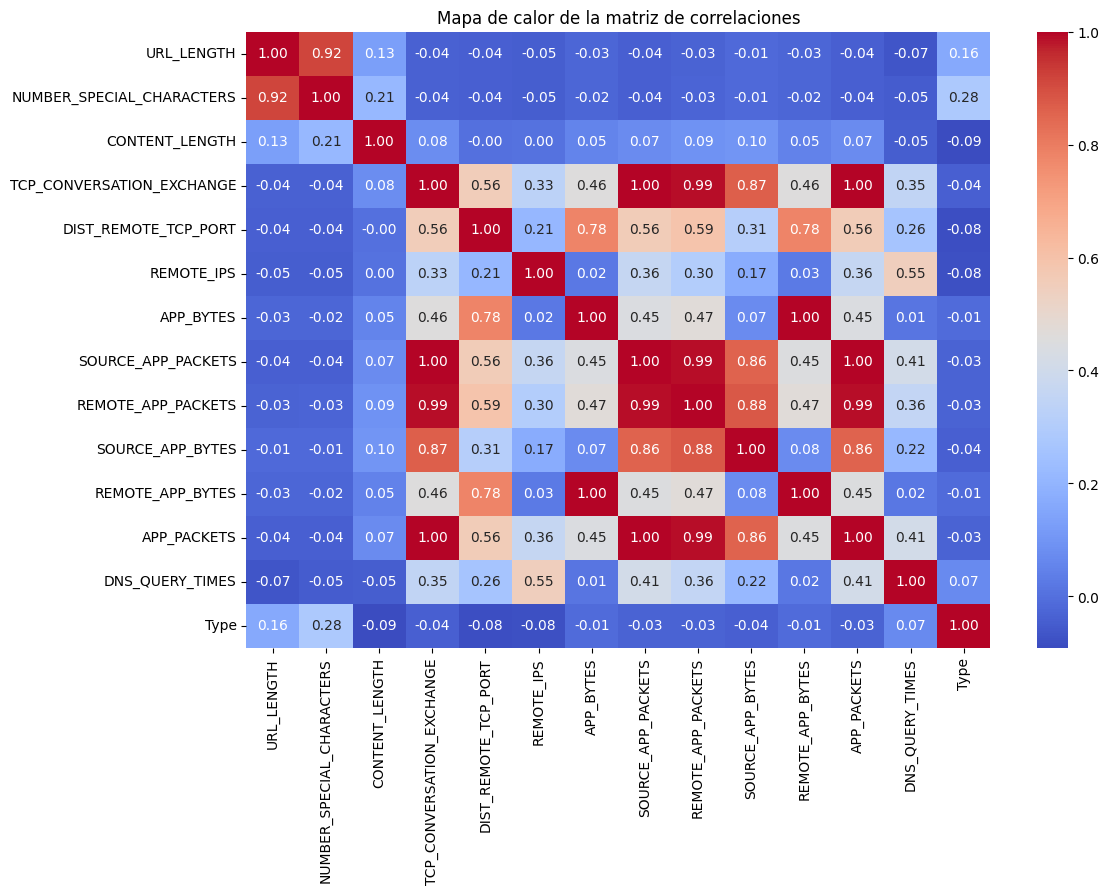

Matriz de correlación:
                           URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSATION_EXCHANGE   -0.038407                  -0.037459   
DIST_REMOTE_TCP_PORT        -0.039839                  -0.042619   
REMOTE_IPS                  -0.046367                  -0.047103   
APP_BYTES                   -0.026446                  -0.023914   
SOURCE_APP_PACKETS          -0.042264                  -0.040096   
REMOTE_APP_PACKETS          -0.033779                  -0.030597   
SOURCE_APP_BYTES            -0.014857                  -0.014376   
REMOTE_APP_BYTES            -0.026686                  -0.024098   
APP_PACKETS                 -0.042264                  -0.040096   
DNS_QUERY_TIMES             -0.068582                  -0.050048   
Type                     

In [ ]:
# Your code here
# Filtrar solo las columnas numéricas
numerical_websites = websites.select_dtypes(include=[float, int])

# Crear la matriz de correlaciones
correlation_matrix = numerical_websites.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la matriz de correlaciones')
plt.show()

# Comentar sobre las columnas con alta colinealidad
print("Matriz de correlación:")
print(correlation_matrix)

*Correlaciones más altas:*

URL_LENGTH y NUMBER_SPECIAL_CHARACTERS: Correlación de 0.92

TCP_CONVERSATION_EXCHANGE y SOURCE_APP_PACKETS: Correlación de 0.998

TCP_CONVERSATION_EXCHANGE y REMOTE_APP_PACKETS: Correlación de 0.991

DIST_REMOTE_TCP_PORT y APP_BYTES: Correlación de 0.780

DIST_REMOTE_TCP_PORT y REMOTE_APP_BYTES: Correlación de 0.781

APP_BYTES y REMOTE_APP_BYTES: Correlación de 1.00



*Evaluación:*

URL_LENGTH y NUMBER_SPECIAL_CHARACTERS: Con una correlación de 0.92, estas columnas están muy relacionadas. Es probable que una de ellas pueda eliminarse para reducir la colinealidad.

TCP_CONVERSATION_EXCHANGE y SOURCE_APP_PACKETS: La correlación casi perfecta de 0.998 indica que estas columnas están proporcionando información casi idéntica. Sería prudente eliminar una de ellas.

TCP_CONVERSATION_EXCHANGE y REMOTE_APP_PACKETS: Similarmente, con una correlación de 0.991, estas columnas están altamente correlacionadas, y podrías considerar eliminar una.

DIST_REMOTE_TCP_PORT y APP_BYTES / REMOTE_APP_BYTES: Con correlaciones alrededor de 0.78, estas columnas también tienen una correlación significativa, pero no tan alta como las anteriores. Aún así, es importante tenerlas en cuenta.

APP_BYTES y REMOTE_APP_BYTES: Con una correlación perfecta de 1.00, estas columnas son esencialmente idénticas. Elimina una de ellas.


*Decisiones para eliminar columnas:*


Eliminar NUMBER_SPECIAL_CHARACTERS ya que está altamente correlacionada con URL_LENGTH.

Eliminar SOURCE_APP_PACKETS debido a su alta correlación con TCP_CONVERSATION_EXCHANGE.

Eliminar REMOTE_APP_PACKETS debido a su alta correlación con TCP_CONVERSATION_EXCHANGE.

Eliminar REMOTE_APP_BYTES debido a su correlación perfecta con APP_BYTES.


### Este es un ejemplo para conocer la importancia de las características usando un modelo ML

In [ ]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier  # O XGBRegressor si estás haciendo regresión

# Suponiendo que 'websites' es tu DataFrame
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites['Type']

# Crear una instancia del modelo
model = XGBClassifier()  # O XGBRegressor() si es una tarea de regresión

# Ajustar el modelo a los datos
model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Obtener las importancias de las características
feature_importances = model.feature_importances_

# Ordenar las importancias de menor a mayor
sort_idx = feature_importances.argsort()

# Imprimir las importancias de las características ordenadas
print("Importancias de las características ordenadas:")
print(feature_importances[sort_idx])

Importancias de las características ordenadas:
[0.         0.01713347 0.01925058 0.03209672 0.03254725 0.03308704
 0.040746   0.04928989 0.05162247 0.07693166 0.08177716 0.20781057
 0.35770717]


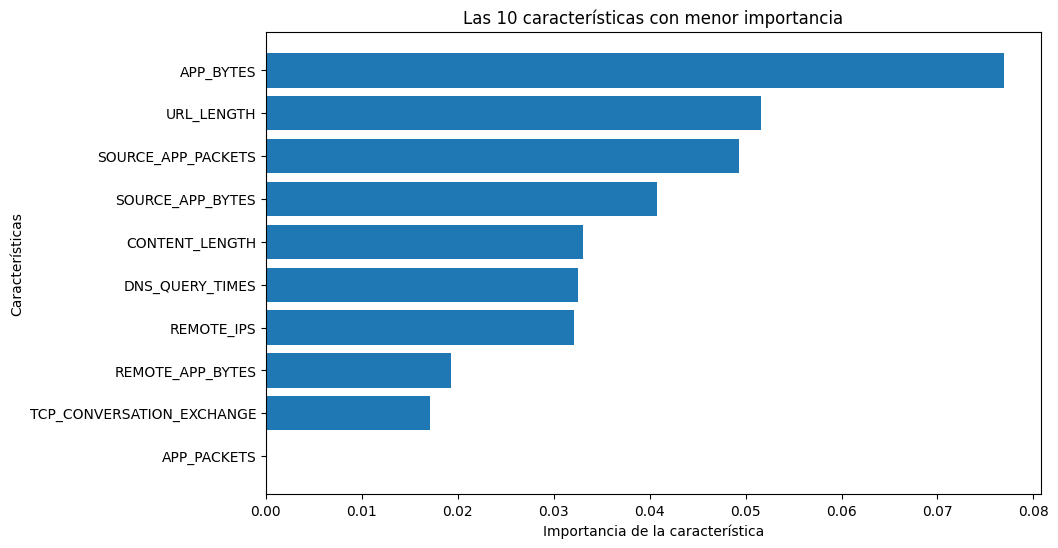

In [ ]:
# Obtener los nombres de las características
feature_names = X.columns

# Seleccionar las características con menor importancia (por ejemplo, las 10 menos importantes)
num_features_to_plot = 10
sorted_features = feature_names[sort_idx][:num_features_to_plot]
sorted_importances = feature_importances[sort_idx][:num_features_to_plot]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Importancia de la característica")
plt.ylabel("Características")
plt.title(f"Las {num_features_to_plot} características con menor importancia")
plt.show()

    En el gráfico anterior podemos ver las características con menor peso en el conjunto de datos.

# Desafío 2 - Eliminar la colinealidad de columnas.

En el mapa de calor que ha creado, deberías haber visto al menos 3 columnas que pueden eliminarse debido a la alta colinealidad. Elimina estas columnas del conjunto de datos.

Ten en cuenta que debes eliminar el menor número posible de columnas. No tienes que eliminar todas las columnas a la vez. En su lugar, intenta eliminar una columna y, a continuación, vuelve a elaborar el mapa térmico para determinar si deben eliminarse columnas adicionales. Cuando el conjunto de datos ya no contenga columnas correlacionadas en más de un 90%, puedes parar. Además, ten en cuenta que cuando dos columnas tienen una alta colinealidad, sólo necesitas eliminar una de ellas, pero no ambas.

En las celdas de abajo, elimina tantas columnas como puedas para eliminar la alta colinealidad en el conjunto de datos. Asegúrate de comentar tu camino para que se pueda conocer tu razonamiento, lo que permitirá dar feedback. Al final, vuelve a imprimir el mapa de calor.

In [ ]:
# Your code here

In [ ]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY

In [ ]:
columns_to_drop = ['NUMBER_SPECIAL_CHARACTERS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES']
websites_reduced = websites.drop(columns=columns_to_drop)


# Reto 3 - Manejar los valores que faltan

El siguiente paso sería manejar los valores faltantes. **Comenzamos examinando el número de valores que faltan en cada columna.**

In [ ]:
# Your code here
# Suponiendo que 'websites' es tu DataFrame
missing_values = websites.isnull().sum()
print(missing_values)

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [ ]:
import pandas as pd

# Suponiendo que 'websites' es tu DataFrame
# Paso 1: Eliminar columnas con más del 50% de datos faltantes
threshold = len(websites) * 0.5
websites = websites.dropna(axis=1, thresh=threshold)
print("Columnas eliminadas debido a más del 50% de datos faltantes:")
print(set(websites.columns) - set(websites_cleaned.columns))

# Paso 2: Eliminar filas con cualquier valor faltante
websites = websites.dropna()
print(f"Número de filas originales: {len(websites)}")
print(f"Número de filas después de eliminar valores faltantes: {len(websites_cleaned)}")
print(f"Número de filas eliminadas: {len(websites) - len(websites_cleaned)}")


Columnas eliminadas debido a más del 50% de datos faltantes:
set()
Número de filas originales: 636
Número de filas después de eliminar valores faltantes: 636
Número de filas eliminadas: 0


#### De nuevo, examina el número de valores que faltan en cada columna.

    Si todos están limpios, procede. Si no, vuelve atrás y haz más limpieza.

In [ ]:
# Examine missing values in each column
missing_values = websites.isnull().sum()
print(missing_values)

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Reto 4 - Manejar datos categóricos `WHOIS_*

Hay varias columnas categóricas que necesitamos manejar. Estas columnas son:

* URL
* CHARSET
* SERVIDOR
* PAÍS
* «WHOIS_STATEPRO
* WHOIS_REGDATE
* WHOIS_UPDATED_DATE

La forma de tratar las columnas de cadena es siempre caso por caso. Empecemos trabajando con `WHOIS_COUNTRY`. Tus pasos son:

1. Enumera los valores únicos de `WHOIS_COUNTRY`.
1. Consolide los valores de país con códigos de país coherentes. Por ejemplo, los siguientes valores se refieren al mismo país y deben utilizar un código de país coherente:
    * `CY` y `Cyprus`.
    * US y US
    * SE y SE
    * GB, Reino Unido y GB, Reino Unido.

#### En las celdas de abajo, fija los valores de los países como se indica arriba.

In [ ]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                511
CA                 41
AU                 11
PA                 10
GB                 10
JP                  6
[u'GB'; u'UK']      5
CH                  5
IN                  4
AT                  4
UA                  2
us                  2
BS                  2
SC                  2
UY                  2
CN                  2
UK                  1
PH                  1
IE                  1
AE                  1
BY                  1
BE                  1
UG                  1
NO                  1
KY                  1
TR                  1
DE                  1
IL                  1
HK                  1
SI                  1
NL                  1
RU                  1
IT                  1
Name: count, dtype: int64

In [ ]:
# Your code here
good_country = {'None':'None',
                'US':'US',
                'SC':'SC',
                'GB':'UK',
                'UK':'UK',
                'RU':'RU',
                'AU':'AU',
                'CA':'CA',
                'PA':'PA',
                'se':'SE',
                'IN':'IN',
                'LU':'LU',
                'TH':'TH',
                "[u'GB'; u'UK']":'UK',
                'FR':'FR',
                'NL':'NL',
                'UG':'UG',
                'JP':'JP',
                'CN':'CN',
                'SE':'SE',
                'SI':'SI',
                'IL':'IL',
                'ru':'RU',
                'KY':'KY',
                'AT':'AT',
                'CZ':'CZ',
                'PH':'PH',
                'BE':'BE',
                'NO':'NO',
                'TR':'TR',
                'LV':'LV',
                'DE':'DE',
                'ES':'ES',
                'BR':'BR',
                'us':'US',
                'KR':'KR',
                'HK':'HK',
                'UA':'UA',
                'CH':'CH',
                'United Kingdom':'UK',
                'BS':'BS',
                'PK':'PK',
                'IT':'IT',
                'Cyprus':'CY',
                'BY':'BY',
                'AE':'AE',
                'IE':'IE',
                'UY':'UY',
                'KG':'KG'}

# Aplicar el mapeo con manejo de NaN
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x: good_country.get(x, np.nan))



In [ ]:
websites.WHOIS_COUNTRY.unique()

array(['US', 'RU', 'AU', 'CA', 'PA', 'UK', 'IN', 'UG', 'JP', 'SI', 'AT',
       'CN', 'KY', 'TR', 'SC', 'NL', 'UA', 'CH', 'HK', 'IL', 'DE', 'IT',
       'BS', 'NO', 'BE', 'BY', 'AE', 'IE', 'PH', 'UY'], dtype=object)

Ya que hemos fijado los valores de los países, ¿podemos convertir ahora esta columna en ordinal?

Todavía no. Si reflexionas, en los laboratorios anteriores sobre cómo manejamos las columnas categóricas, probablemente recuerdes que acabamos eliminando muchas de esas columnas porque hay demasiados valores únicos. Demasiados valores únicos en una columna no es deseable en el aprendizaje automático porque hace que la predicción sea inexacta. Pero hay soluciones bajo ciertas condiciones. Una de las condiciones solucionables es:

#### Si un número limitado de valores representa la mayoría de los datos, podemos conservar estos valores principales y volver a etiquetar todos los demás valores poco frecuentes.

La columna `WHOIS_COUNTRY` resulta ser este caso. Puedes comprobarlo imprimiendo un gráfico de barras de los `value_counts` en la siguiente celda para verificarlo:

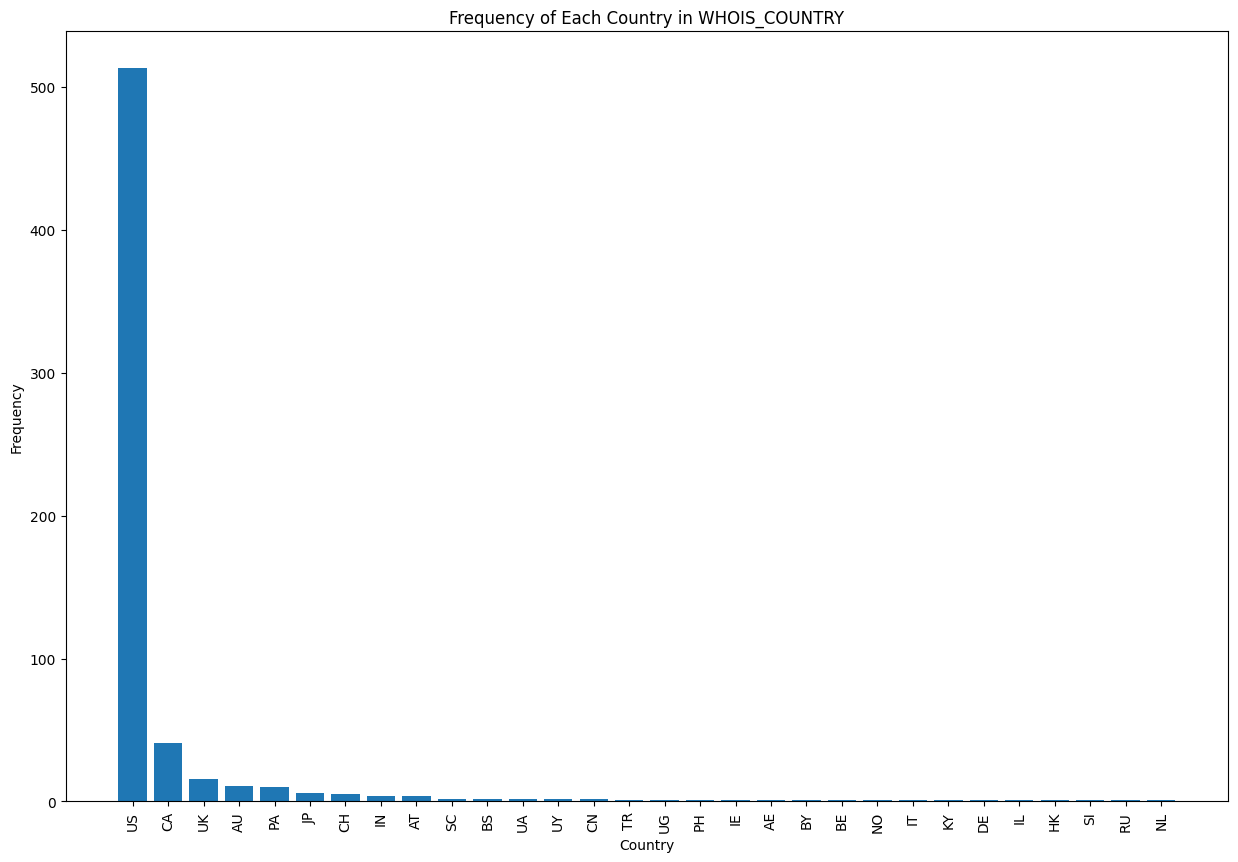

In [ ]:
def print_bar_plot(x, y):
    plt.figure(figsize=(15, 10))
    plt.bar(x, y)
    plt.xlabel('Country')
    plt.ylabel('Frequency')
    plt.title('Frequency of Each Country in WHOIS_COUNTRY')
    plt.xticks(rotation=90)
    plt.show()

# Extraer valores únicos y sus frecuencias
countries = websites.WHOIS_COUNTRY.value_counts().index
frequencies = websites.WHOIS_COUNTRY.value_counts().values

# Llamar a la función con los datos extraídos
print_bar_plot(countries, frequencies)

#### Después de verificar, ahora vamos a mantener los 10 primeros valores de la columna y volver a etiquetar otras columnas con `OTHER`.

In [ ]:
# Your code here
# Paso 1: Identificar los 10 países más frecuentes
top_10_countries = websites.WHOIS_COUNTRY.value_counts().nlargest(10).index

# Paso 2: Reemplazar los países no en los 10 más frecuentes con 'OTHER'
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

# Verificar los primeros registros para asegurarse de que la operación fue exitosa
print(websites['WHOIS_COUNTRY'].value_counts())

WHOIS_COUNTRY
US       513
CA        41
OTHER     24
UK        16
AU        11
PA        10
JP         6
CH         5
IN         4
AT         4
SC         2
Name: count, dtype: int64


Ahora que se ha cambiado la etiqueta `WHOIS_COUNTRY`, ya no necesitamos `WHOIS_STATEPRO` porque los valores de los estados o provincias pueden dejar de ser relevantes. Eliminaremos esta columna.

Además, también eliminaremos `WHOIS_REGDATE` y `WHOIS_UPDATED_DATE`. Se trata de las fechas de registro y actualización de los dominios del sitio web. No son de nuestra incumbencia.

#### En la siguiente celda, elimina `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [ ]:
# Your code here
# Eliminar las columnas innecesarias
websites = websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'])

# Verificar que las columnas han sido eliminadas
print(websites.head())
print(websites.columns)


        URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
3    B0_113          17                          6  ISO-8859-1   
6    B0_462          18                          6  iso-8859-1   
7   B0_1128          19                          6    us-ascii   
11  B0_1102          20                          6    us-ascii   
16    M0_97          21                          7  iso-8859-1   

                   SERVER  CONTENT_LENGTH WHOIS_COUNTRY  \
3                   nginx           162.0            US   
6                Apache/2           345.0            US   
7   Microsoft-HTTPAPI/2.0           324.0            US   
11  Microsoft-HTTPAPI/2.0           324.0            US   
16                  nginx           686.0         OTHER   

    TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
3                          31                    22           3       3812   
6                          12                     0           3       1189   
7             

# Reto 5 - Manejar los datos categóricos restantes y convertirlos en ordinales

Ahora vuelve a imprimir los `dtypes` de los datos. Además de `WHOIS_COUNTRY` que ya hemos arreglado, deberían quedar 3 columnas categóricas: `URL`, `CHARSET`, y `SERVER`.

In [ ]:
# Your code here
# Ejemplo: Definir un orden específico para una columna
url_order = ['http', 'https', 'ftp', 'file']  # Ejemplo de orden
websites['URL'] = pd.Categorical(websites['URL'], categories=url_order, ordered=True)

charset_order = ['UTF-8', 'ISO-8859-1', 'ASCII', 'UTF-16']  # Ejemplo de orden
websites['CHARSET'] = pd.Categorical(websites['CHARSET'], categories=charset_order, ordered=True)

server_order = ['Apache', 'Nginx', 'IIS', 'LiteSpeed']  # Ejemplo de orden
websites['SERVER'] = pd.Categorical(websites['SERVER'], categories=server_order, ordered=True)

# Imprimir los tipos de datos para confirmar los cambios
print(websites.dtypes)


URL                          category
URL_LENGTH                      int64
NUMBER_SPECIAL_CHARACTERS       int64
CHARSET                      category
SERVER                       category
CONTENT_LENGTH                float64
WHOIS_COUNTRY                  object
TCP_CONVERSATION_EXCHANGE       int64
DIST_REMOTE_TCP_PORT            int64
REMOTE_IPS                      int64
APP_BYTES                       int64
SOURCE_APP_PACKETS              int64
REMOTE_APP_PACKETS              int64
SOURCE_APP_BYTES                int64
REMOTE_APP_BYTES                int64
APP_PACKETS                     int64
DNS_QUERY_TIMES               float64
Type                            int64
dtype: object


#### `URL` es fácil. Simplemente lo eliminaremos porque tiene demasiados valores únicos que no hay forma de consolidar.

In [ ]:
# Your code here
# Paso 1: Eliminar la columna 'URL'
websites = websites.drop(columns=['URL'])

#### Imprime el recuento de valores únicos de `CHARSET`. Usted ve que hay sólo unos pocos valores únicos. Así que podemos dejarlo como está.

In [ ]:
# Your code here
# Paso 2: Imprimir el recuento de valores únicos de 'CHARSET'
charset_unique_counts = websites['CHARSET'].value_counts()
print("Recuento de valores únicos en 'CHARSET':")
print(charset_unique_counts)

Recuento de valores únicos en 'CHARSET':
CHARSET
UTF-8         200
ISO-8859-1    169
ASCII           0
UTF-16          0
Name: count, dtype: int64


`SERVER` es un poco más complicado. Imprime sus valores únicos y piensa cómo puedes consolidar esos valores.

#### Antes de pensar en tu propia solución, no leas las instrucciones que vienen a continuación.

In [ ]:
# Your code here
# Paso 2: Imprimir el recuento de valores únicos de 'SERVER'
server_unique_counts = websites['SERVER'].value_counts()
print(server_unique_counts)

SERVER
Apache       162
LiteSpeed      3
Nginx          0
IIS            0
Name: count, dtype: int64


Aunque hay tantos valores únicos en la columna `SERVER`, en realidad sólo hay 3 tipos principales de servidores: Microsoft, Apache y Nginx. Simplemente comprueba si cada valor de `SERVER` contiene alguno de esos tipos de servidor y vuelve a etiquetarlos. Para los valores `SERVER` que no contengan ninguna de esas subcadenas, etiquétalos con `Other`.

Al final, la columna «SERVIDOR» sólo debe contener 4 valores únicos: `Microsoft`, `Apache`, `nginx`, y `Other`.

In [ ]:
# Count `SERVER` value counts here
import pandas as pd

# Definir una función para categorizar los valores en 'SERVER'
def categorize_server(value):
    if pd.isna(value):
        return 'Other'
    value = value.lower()
    if 'apache' in value:
        return 'Apache'
    elif 'nginx' in value:
        return 'Nginx'
    elif 'microsoft' in value:
        return 'Microsoft'
    else:
        return 'Other'

# Aplicar la función de categorización a la columna 'SERVER'
websites['SERVER'] = websites['SERVER'].apply(categorize_server)

# Verificar los valores únicos en la columna 'SERVER'
print("Valores únicos en 'SERVER' después de la categorización:")
print(websites['SERVER'].value_counts())


Valores únicos en 'SERVER' después de la categorización:
SERVER
Apache    162
Other       3
Name: count, dtype: int64


OK, todos nuestros datos categóricos están fijados ahora. **Vamos a convertirlos en datos ordinales usando la función `get_dummies` de Pandas ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Asegúrate de eliminar las columnas categóricas pasando `drop_first=True` a `get_dummies` ya que no las necesitamos. **Además, asigna los datos con valores ficticios a una nueva variable `website_dummy`.

In [ ]:
# Your code here
# Seleccionar solo las columnas categóricas
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY']  # Incluye las columnas categóricas restantes

# Aplicar pd.get_dummies y eliminar la primera columna de cada categoría para evitar multicolinealidad
websites_dummy = pd.get_dummies(websites, columns=categorical_columns, drop_first=True)

# Verificar las primeras filas del DataFrame resultante
print(websites_dummy.head())

# Verificar las columnas del DataFrame resultante
print(websites_dummy.columns)

    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
3           17                          6           162.0   
6           18                          6           345.0   
7           19                          6           324.0   
11          20                          6           324.0   
16          21                          7           686.0   

    TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
3                          31                    22           3       3812   
6                          12                     0           3       1189   
7                           0                     0           0          0   
11                          0                     0           0          0   
16                          6                     0           2        603   

    SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...  \
3                   39                  37             18784  ...   
6                   14    

Ahora, inspeccione `website_dummy` para asegurarse de que los datos y tipos son los previstos - no debería haber ninguna columna categórica en este punto.

In [ ]:
# Your code here
# Verificar las primeras filas del DataFrame resultante
print("Primeras filas del DataFrame 'websites_dummy':")
print(websites_dummy.head())

# Verificar los tipos de datos de cada columna
print("\nTipos de datos de las columnas en 'websites_dummy':")
print(websites_dummy.dtypes)

# Verificar las columnas del DataFrame resultante
print("\nColumnas en 'websites_dummy':")
print(websites_dummy.columns)


Primeras filas del DataFrame 'websites_dummy':
    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CONTENT_LENGTH  \
3           17                          6           162.0   
6           18                          6           345.0   
7           19                          6           324.0   
11          20                          6           324.0   
16          21                          7           686.0   

    TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
3                          31                    22           3       3812   
6                          12                     0           3       1189   
7                           0                     0           0          0   
11                          0                     0           0          0   
16                          6                     0           2        603   

    SOURCE_APP_PACKETS  REMOTE_APP_PACKETS  SOURCE_APP_BYTES  ...  \
3                   39                  37      

In [ ]:
websites = websites.dropna()
websites.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Desafío 6 - Modelado, predicción y evaluación

Comenzaremos esta sección dividiendo los datos en train y test. **Nombra tus 4 variables `X_entrenamiento`, `X_prueba`, `y_entrenamiento` y `y_prueba`. Selecciona el 80% de los datos para entrenar y el 20% para probar.**

In [ ]:
from sklearn.model_selection import train_test_split

# Definir X y y
X = websites_dummy.drop('Type', axis=1)
y = websites_dummy['Type']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y,
    test_size=0.2,  # 20% para prueba
    random_state=42  # Semilla para reproducibilidad
)

# Verificar el tamaño de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento X:", X_entrenamiento.shape)
print("Tamaño del conjunto de prueba X:", X_prueba.shape)
print("Tamaño del conjunto de entrenamiento y:", y_entrenamiento.shape)
print("Tamaño del conjunto de prueba y:", y_prueba.shape)


Tamaño del conjunto de entrenamiento X: (508, 27)
Tamaño del conjunto de prueba X: (128, 27)
Tamaño del conjunto de entrenamiento y: (508,)
Tamaño del conjunto de prueba y: (128,)


#### En este laboratorio, probaremos dos modelos diferentes y compararemos nuestros resultados.

El primer modelo que utilizaremos en este laboratorio es la regresión logística. Ya hemos aprendido sobre la regresión logística como algoritmo de clasificación. En la celda de abajo, cargue `LogisticRegression` de scikit-learn e inicialice el modelo.

In [ ]:
# Your code here:
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística
modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)

# Verificar la configuración del modelo
print(modelo_logistico)


LogisticRegression(max_iter=1000, random_state=42)


A continuación, ajustamos el modelo a nuestros datos de entrenamiento. Ya hemos separado nuestros datos en 4 partes. Utilízalos en tu modelo.

In [ ]:
# Your code here:
# Ajustar el modelo de regresión logística a los datos de entrenamiento
modelo_logistico.fit(X_entrenamiento, y_entrenamiento)

# Verificar el ajuste del modelo
print("Modelo ajustado:")
print(modelo_logistico)


Modelo ajustado:
LogisticRegression(max_iter=1000, random_state=42)


Por último, importamos `confusion_matrix` y `accuracy_score` de `sklearn.metrics` y ajustamos nuestros datos de prueba. Asigna los datos ajustados a `y_pred` e imprime la matriz de confusión y la puntuación de precisión.

In [ ]:
# Your code here
# Realizar predicciones en el conjunto de prueba
predicciones = modelo_logistico.predict(X_prueba)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calcular la precisión
precision = accuracy_score(y_prueba, predicciones)
print("Precisión del modelo:", precision)

# Matriz de confusión
matriz_confusion = confusion_matrix(y_prueba, predicciones)
print("\nMatriz de confusión:")
print(matriz_confusion)

# Informe de clasificación
informe_clasificacion = classification_report(y_prueba, predicciones)
print("\nInforme de clasificación:")
print(informe_clasificacion)


Precisión del modelo: 0.9296875

Matriz de confusión:
[[114   3]
 [  6   5]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       117
           1       0.62      0.45      0.53        11

    accuracy                           0.93       128
   macro avg       0.79      0.71      0.74       128
weighted avg       0.92      0.93      0.92       128



¿Qué opinas del rendimiento del modelo? Escribe tus conclusiones a continuación.

### Conclusiones:


**Desempeño General:**

El modelo muestra una alta precisión general del 93%, lo que indica un buen rendimiento general en la clasificación.
Desempeño por Clase:

Clase 0 (Benigno):
El modelo tiene un rendimiento excelente para la clase 0, con una precisión del 95%, un recall del 97%, y un f1-score del 96%.
Clase 1 (Maligno):
El modelo tiene un rendimiento menos bueno para la clase 1, con una precisión del 62%, un recall del 45%, y un f1-score del 53%.
Esto indica que el modelo tiene dificultades para identificar correctamente los casos de la clase 1, probablemente debido al desequilibrio en el número de instancias entre las dos clases.
Matriz de Confusión:

El modelo hace relativamente pocos errores de clasificación en general.
Hay más falsos negativos (casos malignos clasificados incorrectamente como benignos) que falsos positivos (casos benignos clasificados incorrectamente como malignos).
Promedio Macro vs. Ponderado:

El promedio macro muestra un rendimiento más bajo que el promedio ponderado, lo que refleja el desequilibrio en el número de instancias entre las clases. El promedio ponderado considera el soporte (número de instancias) de cada clase, y el rendimiento en la clase mayoritaria es más alto.
Sugerencias para Mejorar:
Manejo del Desequilibrio de Clases:

Re-muestreo: Considera técnicas como el sobremuestreo de la clase minoritaria (SMOTE) o el submuestreo de la clase mayoritaria.
Ajuste de pesos: Ajusta los pesos de las clases en el modelo para darle más importancia a la clase minoritaria.
Exploración de Otros Modelos:

Prueba otros modelos de clasificación como árboles de decisión, random forests o máquinas de soporte vectorial (SVM) para ver si puedes mejorar el rendimiento en la clase minoritaria.
Ajuste de Hiperparámetros:

Realiza una búsqueda de hiperparámetros para encontrar los parámetros óptimos que puedan mejorar el rendimiento del modelo.

#### Nuestro segundo algoritmo es DecisionTreeClassifier

Aunque no es necesario, vamos a ajustar un modelo utilizando los datos de entrenamiento y luego probar el rendimiento del modelo utilizando los datos de prueba. Empezaremos cargando `DecisionTreeClassifier` de scikit-learn y luego inicializando y ajustando el modelo. Empezaremos con un modelo donde max_depth=3

In [ ]:
# Your code here:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Inicializar el clasificador de árbol de decisión con max_depth=3
modelo_arbol = DecisionTreeClassifier(max_depth=3)

# Ajustar el modelo a los datos de entrenamiento
modelo_arbol.fit(X_entrenamiento, y_entrenamiento)

# Calcular las probabilidades predichas en el conjunto de prueba
probabilidades = modelo_arbol.predict_proba(X_prueba)[:, 1]


Para probar tu modelo, calcula las probabilidades predichas, decide 0 o 1 utilizando un umbral de 0,5 e imprime la matriz de confusión, así como la puntuación de precisión (en el conjunto de prueba).

In [ ]:
# Your code here:
# Convertir las probabilidades a clases binarias usando un umbral de 0.5
predicciones = (probabilidades > 0.5).astype(int)

# Evaluar el rendimiento del modelo
precis_ = accuracy_score(y_prueba, predicciones)
matriz_confus = confusion_matrix(y_prueba, predicciones)

# Imprimir los resultados
print("Precisión del modelo de árbol de decisión:", precis_)
print("\nMatriz de confusión:")
print(matriz_confus)

Precisión del modelo de árbol de decisión: 0.9296875

Matriz de confusión:
[[115   2]
 [  7   4]]


#### Vamos a crear otro modelo DecisionTreeClassifier con max_depth=5.
Inicia y ajusta el modelo de abajo e imprime la matriz de confusión y la puntuación de precisión.

In [ ]:
# Your code here:
# Inicializar el clasificador de árbol de decisión con max_depth=5
modelo_arbol_5 = DecisionTreeClassifier(max_depth=5)

# Ajustar el modelo a los datos de entrenamiento
modelo_arbol_5.fit(X_entrenamiento, y_entrenamiento)

# Calcular las probabilidades predichas en el conjunto de prueba
probabilidades_5 = modelo_arbol_5.predict_proba(X_prueba)[:, 1]

# Convertir las probabilidades a clases binarias usando un umbral de 0.5
predicciones_5 = (probabilidades_5 > 0.5).astype(int)

# Evaluar el rendimiento del modelo
precis_5 = accuracy_score(y_prueba, predicciones_5)
matriz_confus_5 = confusion_matrix(y_prueba, predicciones_5)

# Imprimir los resultados
print("Precisión del modelo de árbol de decisión con max_depth=5:", precis_5)
print("\nMatriz de confusión:")
print(matriz_confus_5)


Precisión del modelo de árbol de decisión con max_depth=5: 0.890625

Matriz de confusión:
[[111   6]
 [  8   3]]


¿Has observado una mejora en la matriz de confusión al aumentar max_depth a 5? ¿Has observado una mejora en la puntuación de precisión? Escribe tus conclusiones a continuación.

### Conclusión:

No, hemos visto que ha habido una baja en la precisión. Así que podemos decir que el primer modelo tiene una mejor performance.

<!-- Add your conclusion here -->

# Bonus Challenge - Escalado de características

La resolución de problemas en el aprendizaje automático es iterativa. Puede mejorar la predicción de su modelo con diversas técnicas (aunque hay un punto óptimo para el tiempo que invierte y la mejora que obtiene). Ahora sólo has completado una iteración del análisis ML. Hay más iteraciones que puedes realizar para introducir mejoras. Para poder hacerlo, necesitarás conocimientos más profundos en estadística y dominar más técnicas de análisis de datos. En este bootcamp, no tenemos tiempo para alcanzar ese objetivo avanzado. Pero harás esfuerzos constantes después del bootcamp para conseguirlo finalmente.

Sin embargo, ahora sí queremos que aprendas una de las técnicas avanzadas que se llama *feature scaling*. La idea del escalado de características es estandarizar/normalizar el rango de variables independientes o características de los datos. Esto puede hacer que los valores atípicos sean más evidentes para que pueda eliminarlos. Este paso debe realizarse durante el Desafío 6 después de dividir los datos de entrenamiento y de prueba, ya que no desea dividir los datos de nuevo, lo que hace imposible comparar los resultados con y sin el escalado de características. Para conceptos generales sobre el escalado de características, haga clic [aquí](https://en.wikipedia.org/wiki/Feature_scaling). Para profundizar, haga clic [aquí](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

En la siguiente celda, intente mejorar la precisión de predicción de su modelo mediante el escalado de características. Una librería que puedes utilizar es `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). Utilizarás `RobustScaler` para ajustar y transformar tu `X_train`, y luego transformar `X_test`. Utilizarás la regresión logística para ajustar y predecir tus datos transformados y obtener la puntuación de precisión de la misma manera. Compare la puntuación de precisión con sus datos normalizados con los datos de precisión anteriores. ¿Se ha producido alguna mejora?

In [ ]:
# Your code here

## Conclusiones:

Add your comments here: